<div style="background-color:blue; color:white; padding:10px; text-align:center; border-radius:5px;">
    <h1>📊 BigMart Sales Analysis Project </h1>
</div>


# Purpose and Objective

## Purpose

The primary purpose of the BigMart Sales Analysis project is to gain insights into sales trends, identify key factors influencing product sales, and develop predictive models to improve decision-making. The project helps businesses optimize inventory management, pricing strategies, and marketing efforts to enhance overall profitability.

## Scope

The project covers:

Data preprocessing: Cleaning and transforming raw sales data for analysis.

Exploratory data analysis (EDA): Identifying patterns and relationships in product and outlet data.

Feature engineering: Creating new meaningful variables to improve predictive models.

Machine learning modeling: Using regression techniques to predict future sales.

Business insights: Drawing actionable conclusions that can guide marketing and inventory strategies.

## Objective 

The project aims to:

Understand how different product attributes (MRP, visibility, category) influence sales.

Examine the impact of outlet characteristics (size, location, type) on sales performance.

Develop regression models to predict Item_Outlet_Sales accurately.

Identify top-selling and low-performing products to optimize inventory.

Provide data-driven insights to support expansion strategies and price optimization.

## Problems This Project Aims to Solve

Lack of clear understanding of sales-driving factors.

Difficulty in predicting sales trends, leading to inefficient inventory management.

Poorly optimized pricing strategies affecting revenue and profitability.

Uncertainty in identifying the best locations and outlet types for future expansion.

Inconsistencies in marketing efforts due to limited data-backed insights.

## Importance of the Project

This project is crucial for retail businesses, as it enables them to:

Improve demand forecasting and avoid overstocking or understocking.

Enhance pricing strategies by understanding the influence of MRP and visibility.

Optimize outlet placements by analyzing sales trends by location and type.

Boost sales by identifying key product categories with the highest potential.

Leverage machine learning models for accurate and data-driven business decisions.

## Relevance of the Project
The project is highly relevant to the retail industry, particularly for supermarket chains and large retail stores. Businesses use sales analysis to maximize revenue, optimize store performance, and improve marketing strategies. Understanding sales patterns and developing predictive models are essential for sustaining competitiveness in the retail sector.

# Summary

##### The **BigMart Sales Analysis Project** is a data-driven initiative designed to help businesses better understand sales trends, optimize inventory management, and refine pricing strategies. By analyzing historical sales data, the project uncovers key factors influencing product sales, such as outlet type, location, pricing, and visibility. Using machine learning models like Linear Regression, Random Forest, and XGBoost, the project builds predictive frameworks that estimate product sales based on product attributes and outlet characteristics.  

##### The analysis provides **valuable business insights**, including identifying high-performing products, sales-driving outlet types, and locations with expansion potential. Data preprocessing and feature engineering are essential components, ensuring the data is clean and suitable for model training. Additionally, hyperparameter tuning enhances model accuracy, leading to more reliable predictions that can inform strategic decisions.  

##### This project plays a crucial role in **inventory optimization, demand forecasting, and market trend analysis**, allowing businesses to make informed choices that maximize revenue and efficiency. Its relevance extends beyond retail, as predictive analytics and sales modeling are widely used in various industries to enhance operational effectiveness. By integrating statistical techniques with machine learning, the project serves as a powerful tool for data-driven decision-making, ensuring businesses remain competitive in an evolving market landscape.

# 1. Understand the Dataset

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

##### Code Explanation:This code imports essential Python libraries for data handling (pandas), visualization (matplotlib, seaborn), preprocessing (LabelEncoder, StandardScaler), model training (train_test_split, LinearRegression, Ridge, RandomForestRegressor, XGBRegressor), evaluation (mean_squared_error, mean_absolute_error, r2_score), optimization (GridSearchCV), numerical operations (numpy), and gradient boosting (xgboost) for predictive modeling.

##### Why it's Important:These libraries are crucial for data-driven tasks as they streamline data preprocessing, visualization, and model training, improving efficiency and accuracy in predictive modeling. They enable handling diverse data formats, applying machine learning algorithms, optimizing hyperparameters, and evaluating model performance, making them indispensable for robust and scalable data science workflows. 

## Examine the dataset structure, column types, and data distributions.

### Load the Dataset

In [2]:
df = pd.read_csv("bigmart_sales.csv")

df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Type,Outlet_Size,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,OUT049,Supermarket Type1,Medium,Tier 1,9.300,0.016047,249.8092,1999,3735.1380
1,DRC01,Regular,Soft Drinks,OUT018,Supermarket Type2,Medium,Tier 3,5.920,0.019278,48.2692,2009,443.4228
2,FDN15,Low Fat,Meat,OUT049,Supermarket Type1,Medium,Tier 1,17.500,0.016760,141.6180,1999,2097.2700
3,NCD19,Low Fat,Household,OUT013,Supermarket Type1,High,Tier 3,8.930,0.000000,53.8614,1987,994.7052
4,FDP36,Regular,Baking Goods,OUT018,Supermarket Type2,Medium,Tier 3,10.395,0.000000,51.4008,2009,556.6088


##### Code Explanation:The first line, df = pd.read_csv("bigmart_sales.csv"), loads the dataset named bigmart_sales.csv into a pandas DataFrame (df), allowing structured data manipulation. The second line, df.head(), displays the first five rows of the dataset, offering a quick preview of its contents for initial exploration and validation.
##### Why it's Important:This code is important because it loads the dataset into a structured format (pandas DataFrame), enabling efficient data exploration, manipulation, and analysis. Using .head() allows a quick glance at the first few rows, helping verify the data's structure, detect anomalies, and gain initial insights for preprocessing and model building.

## Check Structure & Column Info

In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6113 entries, 0 to 6112
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Fat_Content           6113 non-null   object 
 2   Item_Type                  6113 non-null   object 
 3   Outlet_Identifier          6113 non-null   object 
 4   Outlet_Type                6113 non-null   object 
 5   Outlet_Size                6113 non-null   object 
 6   Outlet_Location_Type       6113 non-null   object 
 7   Item_Weight                6113 non-null   float64
 8   Item_Visibility            6113 non-null   float64
 9   Item_MRP                   6113 non-null   float64
 10  Outlet_Establishment_Year  6113 non-null   int64  
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 573.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Code Explanation: df.info() provides a summary of the DataFrame's structure, including column names, data types, and non-null values, while df.describe() generates key statistical insights for numerical columns, aiding data exploration.
##### Why it's Important:These methods are essential for data exploration—df.info() helps assess data integrity by showing column types, missing values, and memory usage, while df.describe() provides statistical summaries that reveal patterns, outliers, and distributions in numerical data, aiding in informed decision-making for preprocessing and modeling.

### Identify Data Types

In [4]:
df.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Type                     object
Outlet_Identifier             object
Outlet_Type                   object
Outlet_Size                   object
Outlet_Location_Type          object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

##### Code Explanation:df.dtypes returns the data types of all columns in the DataFrame, helping identify whether each column is numerical, categorical, or object-based, which is essential for data preprocessing and analysis.
##### Why it's Important:df.dtypes is important because it helps identify the data types of each column, which is crucial for selecting appropriate preprocessing steps, handling categorical or numerical variables correctly, and ensuring smooth model implementation.

### Visualize Data Distributions

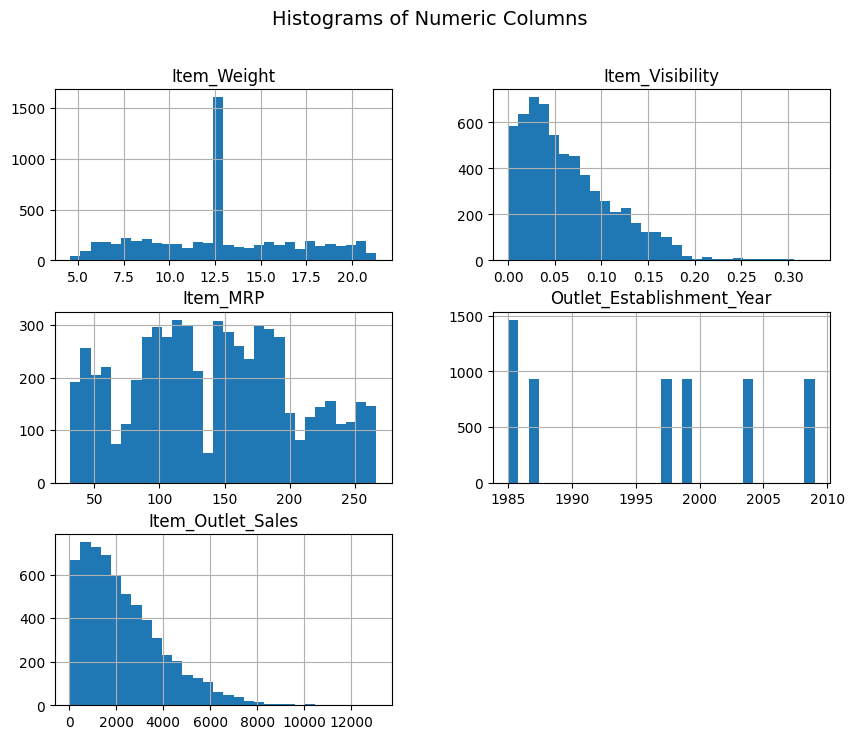

In [5]:
# Plot histograms for all numeric columns
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Histograms of Numeric Columns", fontsize=14)
plt.show()

##### Code Explanation:This code creates histograms for all numerical columns in the DataFrame (df) using df.hist(), with a figure size of (10, 8) and 30 bins per histogram, adds a title using plt.suptitle(), and displays the plots with plt.show(), helping visualize the distribution of numerical data.
##### why it's Important:This code is important because it visually represents the distribution of numerical columns, helping identify trends, skewness, outliers, and data patterns. Histograms provide insights into the spread of values, guiding data preprocessing steps like normalization, scaling, or handling imbalanced datasets for better model performance.

## Check for missing values and anomalies in fields like Item_Weight and Outlet_Size.

### Check for Missing Values

In [6]:
missing_values = df[["Item_Weight", "Outlet_Size"]].isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Item_Weight    0
Outlet_Size    0
dtype: int64


##### Code Explanation:This code checks for missing values in the "Item_Weight" and "Outlet_Size" columns of the DataFrame (df) using .isnull().sum(), which counts the number of missing entries, then prints the result to display the total count of missing values for each column.
##### Why it's Important:This code is important because it helps identify missing values in key columns, allowing data preprocessing steps like imputation or removal. Handling missing data properly ensures model accuracy, prevents biases, and improves the reliability of predictive insights.

### Detecting Anomalies

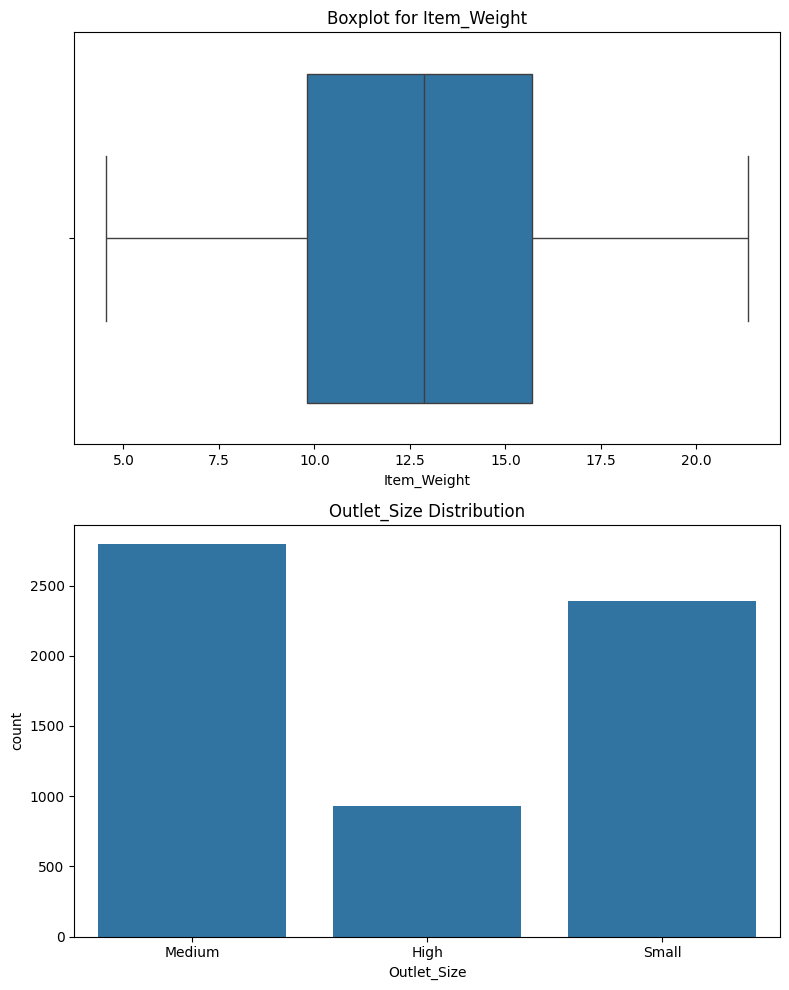

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Boxplot for Item_Weight
sns.boxplot(x=df["Item_Weight"], ax=axes[0])
axes[0].set_title("Boxplot for Item_Weight")

# Boxplot for Outlet_Size (categorical distribution)
sns.countplot(x=df["Outlet_Size"], ax=axes[1])
axes[1].set_title("Outlet_Size Distribution")

plt.tight_layout()
plt.show()

##### Code Explanation:This code creates a figure with two subplots using plt.subplots(2, 1), setting the figure size to (8, 10). The first subplot displays a boxplot for "Item_Weight" using sns.boxplot(), helping visualize outliers and distribution. The second subplot uses sns.countplot() to show the categorical distribution of "Outlet_Size", highlighting the frequency of different categories. plt.tight_layout() adjusts spacing, ensuring clear visibility, and plt.show() displays the plots.
##### Why it's Important:This code is important because it helps visualize numeric and categorical data distributions, aiding in outlier detection, variability analysis, and category frequency understanding. The boxplot highlights extreme values in "Item_Weight", guiding potential data cleaning steps, while the countplot shows the distribution of "Outlet_Size", providing insights into category representation and possible imbalances for model training.

# 2. Data Cleaning

## Impute missing values appropriately (e.g., median for weights, mode for outlet size).

### Handling Missing Values

In [8]:
# Impute missing values for Item_Weight using median
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].median())

# Impute missing values for Outlet_Size using mode (most frequent value)
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

# Verify that missing values are handled
print("Missing values after imputation:\n", df[["Item_Weight", "Outlet_Size"]].isnull().sum())

Missing values after imputation:
 Item_Weight    0
Outlet_Size    0
dtype: int64


##### Code Explanation:This code imputes missing values in "Item_Weight" using the median (to handle skewed numerical data) and fills missing values in "Outlet_Size" using the mode (most frequent category), ensuring data completeness. It then verifies that missing values are successfully handled by printing the count of remaining null values.
##### Why it's Important:This code is crucial for handling missing data, ensuring the dataset remains complete and ready for analysis. By imputing "Item_Weight" with the median, it preserves the central tendency without being affected by extreme values, while filling "Outlet_Size" with the most frequent category maintains consistency in categorical data. Proper missing value treatment prevents biased results and improves model accuracy.

### Identify Unique Categories

In [9]:
print(df["Item_Fat_Content"].unique())

['Low Fat' 'Regular' 'low fat' 'reg' 'LF']


##### Code Explanation:print(df["Item_Fat_Content"].unique()) retrieves and prints the unique values present in the "Item_Fat_Content" column, helping identify distinct categories in the dataset for potential preprocessing or analysis.
##### Why it's Important:This code is important because it helps identify inconsistencies or variations in categorical data, which is crucial for data cleaning and standardization. Detecting unique values in "Item_Fat_Content" allows you to check for duplicates (e.g., "Low Fat" vs. "low fat") or unexpected entries, ensuring consistency and improving model performance.

## Standardize categorical fields (e.g., unify different spellings of Low Fat).

### Standardize Categories

In [10]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "Low Fat": "Low Fat",
    "reg": "Regular",
    "Regular": "Regular"
})

##### Code Explanation:This code standardizes categorical values in the "Item_Fat_Content" column by replacing different representations ("LF", "low fat") with "Low Fat" and ("reg", "Regular") with "Regular", ensuring consistency in data for accurate analysis and modeling.
##### why it's Important:This code is important because it ensures data consistency by standardizing different representations of "Item_Fat_Content", preventing errors in categorical analysis. Cleaning inconsistent labels improves model accuracy, prevents redundancy, and ensures proper grouping during encoding or feature extraction

### Verify Changes

In [11]:
print(df["Item_Fat_Content"].unique())

['Low Fat' 'Regular']


##### Code Explanation:print(df["Item_Fat_Content"].unique()) retrieves and displays the distinct values present in the "Item_Fat_Content" column, helping identify unique categories for data consistency and preprocessing.
##### Why it's Important:This code is important because it ensures that the categorical cleaning process was successful by displaying the updated unique values in "Item_Fat_Content". It helps verify that inconsistencies were corrected, ensuring data quality, consistency, and improved accuracy in model training.

# 3. Exploratory Data Analysis (EDA)

## Analyze numerical and categorical variables.

### Categorical variable distribution

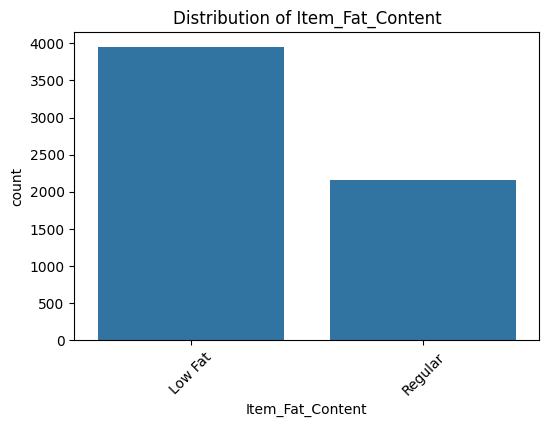

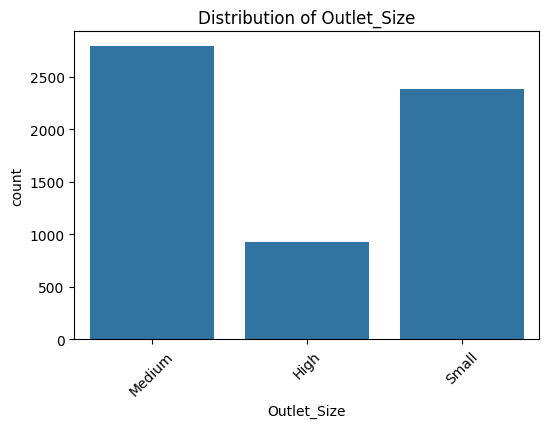

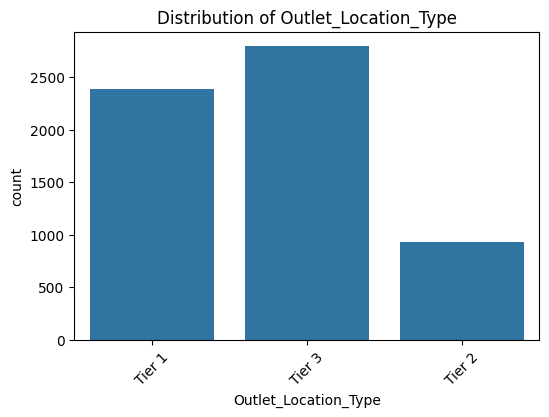

In [12]:
# Bar plot for categorical variables
categorical_columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type"]
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

##### Code Explanation:This code creates bar plots for categorical variables in the DataFrame (df). It iterates through the specified categorical columns ("Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type") and generates count plots using sns.countplot(), which visually represents the frequency of each category. The plots are formatted with figsize=(6, 4) for better readability, titled dynamically using plt.title(), and rotated x-axis labels using plt.xticks(rotation=45) to prevent overlap. Finally, plt.show() displays the plots.
##### Why it's Important:This code is important because it visually represents the distribution of categorical variables, helping identify imbalances, trends, and potential inconsistencies in categories like "Item_Fat_Content", "Outlet_Size", and "Outlet_Location_Type". Bar plots offer insights into the prevalence of each category, guiding data preprocessing decisions and ensuring balanced feature representation for accurate model training.

### Bivariate Analysis (Relationships Between Variables)

In [13]:
# Convert numeric columns that may be mistakenly stored as strings
df["Item_Weight"] = pd.to_numeric(df["Item_Weight"], errors="coerce")
df["Item_Outlet_Sales"] = pd.to_numeric(df["Item_Outlet_Sales"], errors="coerce")

##### Code Explanation:This code converts the "Item_Weight" and "Item_Outlet_Sales" columns to numeric data types using pd.to_numeric(). The errors="coerce" parameter ensures that any non-numeric values are replaced with NaN, preventing type mismatches and enabling smooth numerical processing for analysis or modeling.
##### Why it's Important:This code is important because it ensures that "Item_Weight" and "Item_Outlet_Sales" are correctly formatted as numeric values, preventing errors in mathematical operations, statistical analysis, and model training. By coercing non-numeric values into NaN, it allows easy identification and handling of invalid data, ensuring smooth data processing and reliable insights.

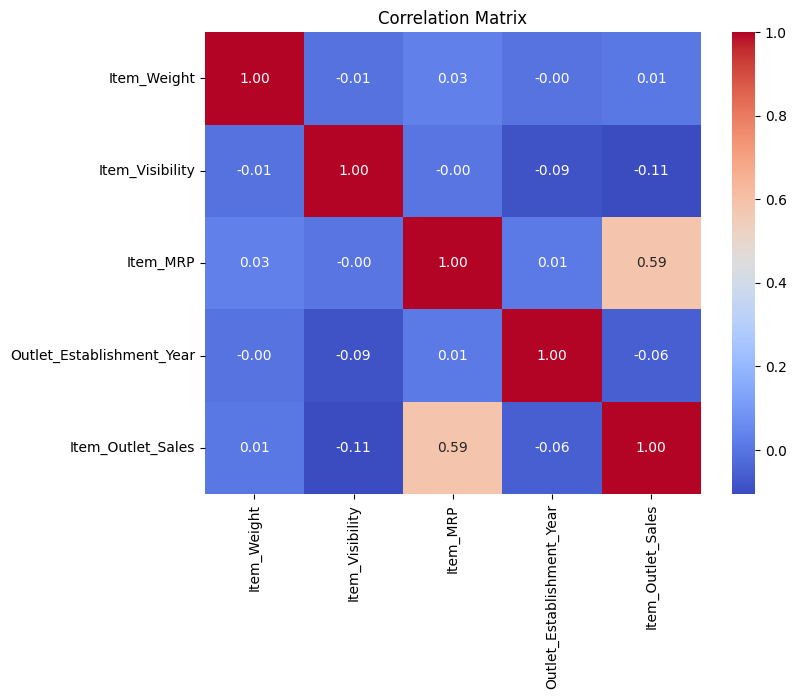

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##### Code Explanation:This code first **selects only numeric columns** from the DataFrame (`df`) using `df.select_dtypes(include=["number"])`, ensuring that correlation analysis is performed only on numerical data. Then, it computes the **correlation matrix** using `.corr()`, which quantifies relationships between numeric variables. To visualize the correlations, it uses `sns.heatmap()`, displaying the correlation values inside a **heatmap** with annotations (`annot=True`) and a **"coolwarm"** colormap to enhance readability. The format (`fmt=".2f"`) ensures values are shown with two decimal places. Finally, the plot is given a title and displayed using `plt.show()`. This approach helps identify strong correlations between features, guiding feature selection and model improvements.
##### why it's Important:This code is important because it helps **analyze relationships between numerical variables** in the dataset. The **correlation matrix** highlights strong and weak associations, allowing you to detect **multicollinearity**, identify **predictive features**, and understand dependencies between variables. This insight guides **feature selection**, helping improve model performance and reducing redundancy in data-driven decisions.


### Detecting Outliers

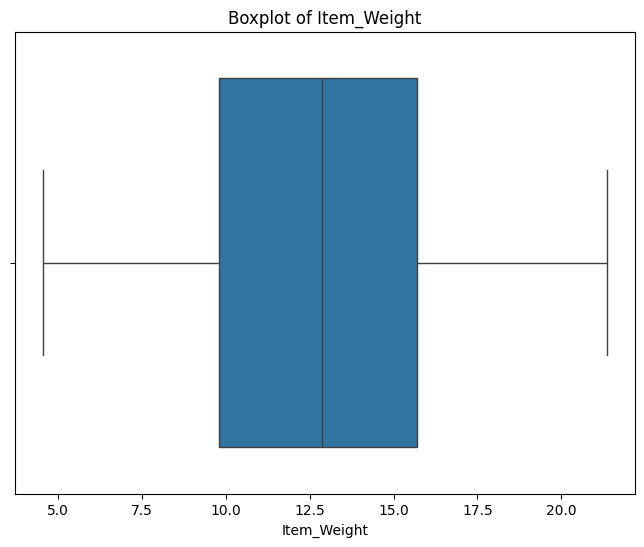

In [15]:
# Boxplot for Item_Weight
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Item_Weight"])
plt.title("Boxplot of Item_Weight")
plt.show()

##### Code Explanation: This code generates a **boxplot** for `"Item_Weight"` to visualize its distribution, detect **outliers**, and assess data variability for better preprocessing and analysis.
##### Why it's Important:This code is important because it **visualizes the distribution of "Item_Weight"** while helping **detect outliers and skewness** in the data. Boxplots reveal **the median, quartiles, and extreme values**, making it easier to identify potential anomalies or inconsistencies that may need handling during preprocessing. Understanding this distribution ensures better **data integrity and model performance** by addressing issues like **data scaling, transformation, or outlier removal**. 

## Visualize relationships between Item_MRP, Item_Visibility, and Item_Outlet_Sales.

### Scatter Plots

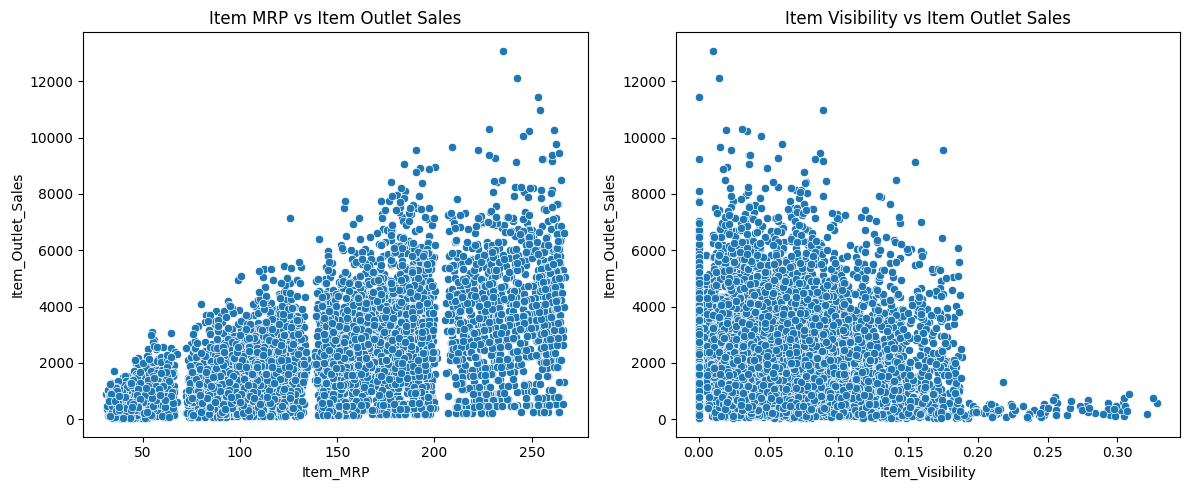

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Relationship between Item_MRP and Item_Outlet_Sales
sns.scatterplot(x=df["Item_MRP"], y=df["Item_Outlet_Sales"], ax=axes[0])
axes[0].set_title("Item MRP vs Item Outlet Sales")

# Relationship between Item_Visibility and Item_Outlet_Sales
sns.scatterplot(x=df["Item_Visibility"], y=df["Item_Outlet_Sales"], ax=axes[1])
axes[1].set_title("Item Visibility vs Item Outlet Sales")

plt.tight_layout()
plt.show()

##### Code Explanation:The code creates a figure with two scatter plots, showing how Item MRP and Item Visibility relate to Item Outlet Sales using `sns.scatterplot()`, then adjusts the layout and displays the plots.
##### Why it's Important:These scatter plots help visualize the relationships between Item MRP and Item Visibility with Item Outlet Sales, allowing insights into how pricing and product exposure impact sales performance, which is essential for strategic decision-making.

### Pair Plot for Full Interaction

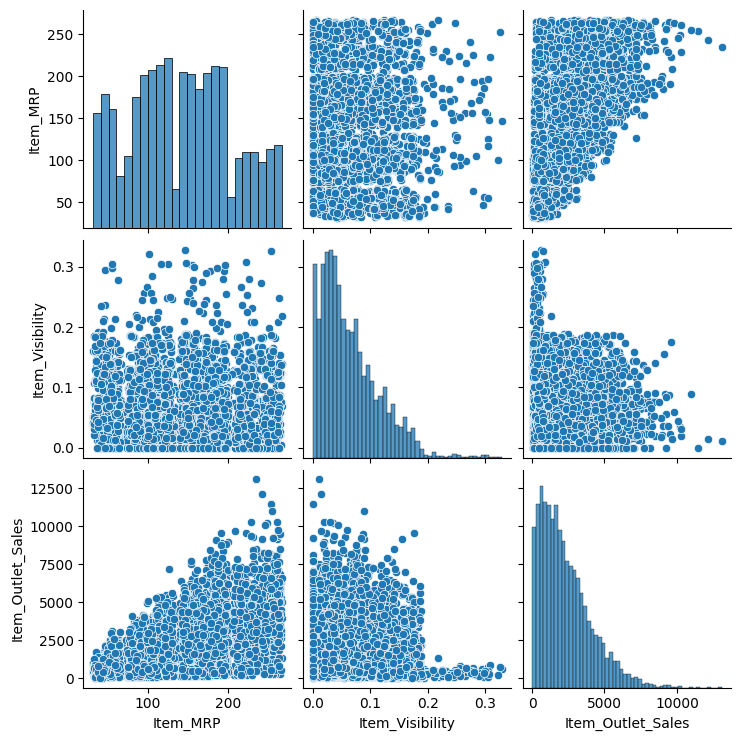

In [17]:
sns.pairplot(df[["Item_MRP", "Item_Visibility", "Item_Outlet_Sales"]], kind="scatter")
plt.show()

##### Code Explanation:The code uses `sns.pairplot()` to create scatter plots for all pairwise relationships among `Item_MRP`, `Item_Visibility`, and `Item_Outlet_Sales`, helping visualize correlations between these features, and then displays the plots.
##### Why it's Important:Pair plots allow quick visualization of relationships between multiple variables, helping identify correlations, trends, and potential patterns in the data, which is crucial for understanding key factors influencing sales performance.

## Study sales across different outlet types and item categories.

### Sales Across Different Outlet Types

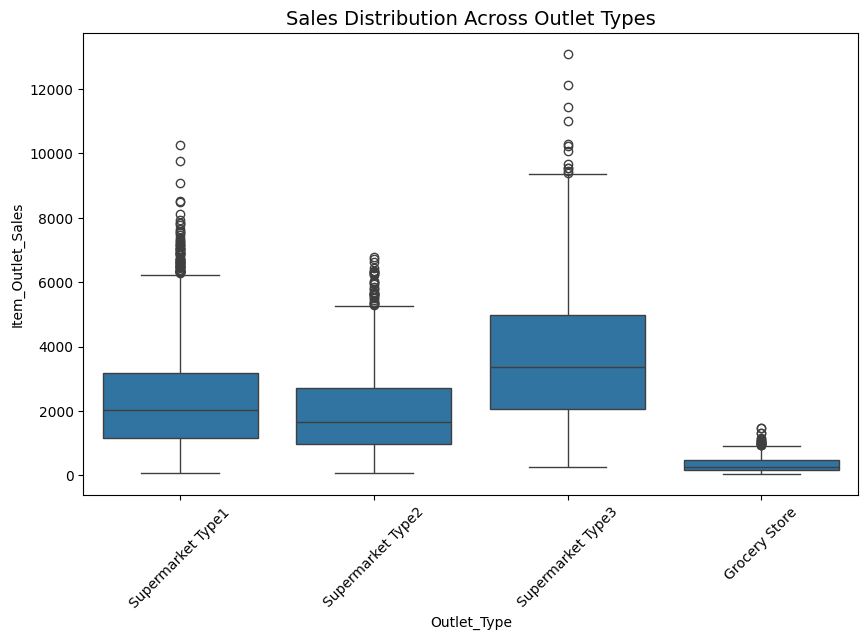

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)
plt.title("Sales Distribution Across Outlet Types", fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### Code Explanation:This code creates a boxplot to visualize sales distribution across different outlet types. It first sets the figure size, then plots a boxplot with outlet types on the x-axis and sales on the y-axis. A title is added, and x-axis labels are rotated for readability before displaying the final plot. This helps highlight variations and potential outliers in sales across different outlet types.

##### Why its Important:This visualization is important because it helps compare sales across different outlet types, revealing trends, variations, and potential outliers. It provides a clear understanding of which outlet types perform better or worse, aiding in decision-making and strategic planning.

### Sales Across Item Categories

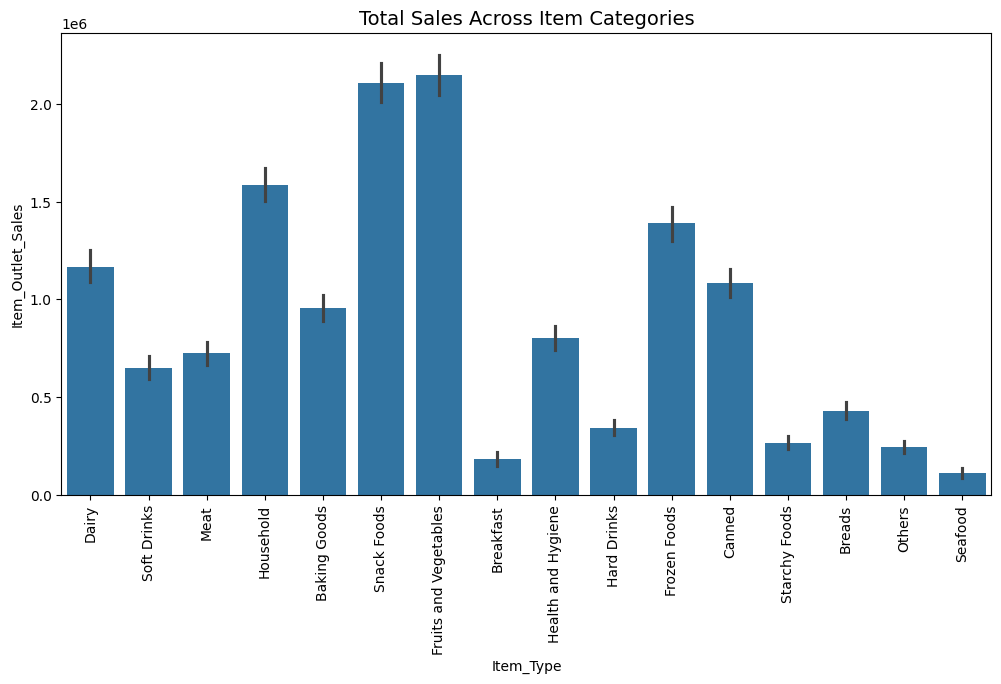

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df, estimator=sum)
plt.title("Total Sales Across Item Categories", fontsize=14)
plt.xticks(rotation=90)
plt.show()

##### Code Explanation:This code creates a bar plot to visualize total sales across different item categories. It first sets the figure size, then plots a bar chart with item types on the x-axis and total sales on the y-axis, using `sum` as the estimator to aggregate sales. A title is added, and x-axis labels are rotated for readability before displaying the final plot.

##### Why its Important: This visualization helps analyze which item categories generate the highest sales, identifying top-performing products and aiding in business strategy and inventory planning.

# 4. Feature Engineering

## Create new features such as item category, MRP range, years of operation.

### Create an Item Category Feature

In [20]:
def categorize_item(item_type):
    if item_type in ["Fruits and Vegetables", "Dairy", "Meat", "Baking Goods", "Canned", "Frozen Foods", "Snack Foods"]:
        return "Food"
    elif item_type in ["Soft Drinks", "Hard Drinks"]:
        return "Drinks"
    else:
        return "Non-Consumable"

df["Item_Category"] = df["Item_Type"].apply(categorize_item)

##### Code Explanation:This code defines a function `categorize_item()` that classifies items into broad categories: "Food," "Drinks," or "Non-Consumable," based on their type. It checks if an item belongs to predefined food or drink groups and assigns an appropriate category; otherwise, it is labeled as "Non-Consumable." The function is then applied to the `"Item_Type"` column in `df`, creating a new `"Item_Category"` column.

##### Why its Important:This categorization helps in analyzing sales trends based on broader product groups, aiding in better inventory management and strategic decision-making.


### Create an MRP Range Feature

In [21]:
df["MRP_Range"] = pd.cut(df["Item_MRP"], bins=[0, 100, 200, df["Item_MRP"].max()], labels=["Low", "Medium", "High"])

##### Code Explanation: This code creates a new column, `"MRP_Range"`, by categorizing item prices into three groups: "Low," "Medium," and "High." It uses `pd.cut()` to divide the `"Item_MRP"` values into bins based on price ranges—items below 100 are labeled "Low," those between 100 and 200 are "Medium," and anything above 200 is classified as "High."

##### Why its Important:This helps analyze pricing trends, identify sales patterns based on price ranges, and optimize pricing strategies for better business decisions.


### Create a Years of Operation Feature

In [22]:
current_year = datetime.datetime.now().year
df["Years_of_Operation"] = current_year - df["Outlet_Establishment_Year"]

##### Code Explanation: This code calculates the number of years each outlet has been in operation. It first gets the current year using `datetime.datetime.now().year` and then subtracts the `"Outlet_Establishment_Year"` from it to create the `"Years_of_Operation"` column.

##### Why its Important:Understanding how long an outlet has been running helps in analyzing business performance over time, identifying trends, and making informed strategic decisions.


### Final Check

In [23]:
print(df[["Item_Category", "MRP_Range", "Years_of_Operation"]].head())

    Item_Category MRP_Range  Years_of_Operation
0            Food      High                  26
1          Drinks       Low                  16
2            Food    Medium                  26
3  Non-Consumable       Low                  38
4            Food       Low                  16


##### Code Explanation: This code prints the first few rows of a DataFrame containing the `"Item_Category"`, `"MRP_Range"`, and `"Years_of_Operation"` columns using `.head()`, which displays a preview of the data.

##### Why its Important: This helps quickly inspect and verify the categorized item data, pricing range, and outlet operation years, ensuring the data is correctly processed before further analysis.

## Encode categorical variables using Label Encoding or One-Hot Encoding.

### Label Encoding (Assigning Numeric Labels)

In [24]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ["Outlet_Size", "Outlet_Location_Type", "Item_Fat_Content"]
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check encoded values
print(df[categorical_cols].head())

   Outlet_Size  Outlet_Location_Type  Item_Fat_Content
0            1                     0                 0
1            1                     2                 1
2            1                     0                 0
3            0                     2                 0
4            1                     2                 1


##### Code Explanation: This code initializes a `LabelEncoder` to convert categorical values into numeric format. It loops through the specified categorical columns—`"Outlet_Size"`, `"Outlet_Location_Type"`, and `"Item_Fat_Content"`—applying `fit_transform()` to encode them. Finally, it prints the first few rows of the encoded columns to verify the transformation.

##### Why its Important: Encoding categorical data is crucial for machine learning models that require numerical inputs. This ensures the dataset is ready for analysis and modeling.


### One-Hot Encoding (Creating Dummy Variables)

In [25]:
df_encoded = pd.get_dummies(df, columns=["Outlet_Type", "Item_Type"], drop_first=True)

# Check transformed data
print(df_encoded.head())

  Item_Identifier  Item_Fat_Content Outlet_Identifier  Outlet_Size  \
0           FDA15                 0            OUT049            1   
1           DRC01                 1            OUT018            1   
2           FDN15                 0            OUT049            1   
3           NCD19                 0            OUT013            0   
4           FDP36                 1            OUT018            1   

   Outlet_Location_Type  Item_Weight  Item_Visibility  Item_MRP  \
0                     0        9.300         0.016047  249.8092   
1                     2        5.920         0.019278   48.2692   
2                     0       17.500         0.016760  141.6180   
3                     2        8.930         0.000000   53.8614   
4                     2       10.395         0.000000   51.4008   

   Outlet_Establishment_Year  Item_Outlet_Sales  ...  \
0                       1999          3735.1380  ...   
1                       2009           443.4228  ...   
2       

##### Code Explanation: This code applies one-hot encoding to the `"Outlet_Type"` and `"Item_Type"` columns using `pd.get_dummies()`, converting categorical data into numerical format. The `drop_first=True` parameter removes the first category from each column to avoid redundancy. Finally, the transformed DataFrame is printed to check the encoding.

##### Why its Important: One-hot encoding ensures categorical variables are represented in a format suitable for machine learning models, improving their ability to interpret and process the data effectively.

# 5. Machine Learning Tasks 

## Sales Prediction Model: Use regression models (Linear Regression, Random Forest, XGBoost) to predict Item_Outlet_Sales.

## Prepare the Data & Train Different Models

In [26]:
# Define features and target variable
X = df.drop(columns=["Item_Outlet_Sales"])  # Remove target column
y = df["Item_Outlet_Sales"]  # Target variable

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=["number"]))  # Only numeric columns

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### Code Explanation: This code prepares data for machine learning by defining features (`X`) and the target variable (`y`). It removes the target column from `df`, then standardizes numeric features using `StandardScaler()` for consistent scaling. Finally, it splits the dataset into training and testing sets with an 80-20 ratio using `train_test_split()`.  

##### Why its Important: Standardizing ensures uniform data scaling, improving model performance, while splitting helps evaluate the model’s accuracy on unseen data.


## Linear Regression 

In [27]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5
print("Linear Regression RMSE:", rmse_lr)

Linear Regression RMSE: 1301.8518263832168


##### Code Explanation: This code trains a Linear Regression model using `X_train` and `y_train`, then makes predictions on `X_test`. It calculates the Root Mean Squared Error (RMSE) using `mean_squared_error()` to measure prediction accuracy and prints the result.

##### Why its Important: Linear Regression helps understand relationships between features and sales, while RMSE evaluates model performance by quantifying prediction errors.


## Random Forest Regressor

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 1132.4172542266767


##### Code Explanation: This code trains a `RandomForestRegressor` model using `X_train` and `y_train`, setting `n_estimators=100` to use 100 decision trees. It then makes predictions on `X_test` and calculates the Root Mean Squared Error (RMSE) using `mean_squared_error()` to evaluate prediction accuracy.

##### Why its Important: Random Forest improves prediction performance by combining multiple decision trees, reducing overfitting and handling complex patterns in the data better than simple linear models.


## XGBoost Regressor

In [29]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5
print("XGBoost RMSE:", rmse_xgb)

XGBoost RMSE: 1132.9897890753366


##### Code Explanation: This code trains an `XGBRegressor` model using `X_train` and `y_train`, setting `n_estimators=100` to use 100 boosting rounds and `learning_rate=0.1` to control step size in gradient updates. It then predicts sales on `X_test` and calculates the Root Mean Squared Error (RMSE) using `mean_squared_error()` to evaluate accuracy.

##### Why its Important: XGBoost is a powerful and efficient model that handles complex patterns and large datasets effectively, often outperforming traditional models in predictive accuracy.


## Hyperparameter Tuning for Random Forest

In [30]:
# Define parameter grid
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Run GridSearchCV
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best parameters & RMSE
print("Best RF Parameters:", rf_grid.best_params_)
print("Best RF RMSE:", -rf_grid.best_score_)

Best RF Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best RF RMSE: 1149.728392727804


##### Code Explanation: This code performs hyperparameter tuning for a `RandomForestRegressor` using `GridSearchCV`. It defines a parameter grid with different values for `n_estimators`, `max_depth`, and `min_samples_split`, then initializes the model. `GridSearchCV` runs a 5-fold cross-validation to find the best combination of parameters, optimizing for the lowest Root Mean Squared Error (RMSE). Finally, it prints the best parameters and their corresponding RMSE score.

##### Why its Important: Hyperparameter tuning improves model accuracy by selecting the optimal configuration, ensuring better generalization and performance on unseen data.

## Hyperparameter Tuning for XGBoost

In [31]:
xgb_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 6, 10]
}

xgb_model = XGBRegressor(random_state=42)

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost RMSE:", -xgb_grid.best_score_)

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost RMSE: 1140.8783801638845


##### Code Explanation: This code performs hyperparameter tuning for an `XGBRegressor` using `GridSearchCV`. It defines a grid of parameter values for `n_estimators`, `learning_rate`, and `max_depth`, then initializes the model. `GridSearchCV` runs a 5-fold cross-validation to find the best combination of parameters that minimizes Root Mean Squared Error (RMSE). Finally, it prints the best parameters and the corresponding RMSE score.

##### Why its Important: Tuning XGBoost enhances its predictive performance by optimizing key hyperparameters, leading to a more accurate and generalizable model for making sales predictions.


## Hyperparameter Tuning for Linear Regression

In [32]:
# Define parameter grid with only valid parameters
param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [None, -1]
}

# Initialize model
linear_model = LinearRegression()

# Run GridSearchCV
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & RMSE
print("Best Linear Regression Parameters:", grid_search.best_params_)
print("Best Linear Regression RMSE:", -grid_search.best_score_)

Best Linear Regression Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}
Best Linear Regression RMSE: 1361.4986699277974


##### Code Explanation: This code performs hyperparameter tuning for a `LinearRegression` model using `GridSearchCV`. It defines a valid parameter grid with options for `fit_intercept`, `copy_X`, and `n_jobs`, initializes the model, and runs a 5-fold cross-validation to optimize for the lowest Root Mean Squared Error (RMSE). Finally, it prints the best parameters and their corresponding RMSE score.

##### Why its Important: Fine-tuning hyperparameters helps improve model accuracy and performance, ensuring the best configuration for making reliable predictions.

In [33]:
ridge_params = {"alpha": np.logspace(-3, 3, 10)}

ridge_model = Ridge()

ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge RMSE:", -ridge_grid.best_score_)

Best Ridge Alpha: {'alpha': np.float64(10.0)}
Best Ridge RMSE: 1361.4969097321887


##### Code Explanation: This code performs hyperparameter tuning for a `Ridge` regression model using `GridSearchCV`. It defines a parameter grid where `alpha` is tested over a logarithmic range from `10^-3` to `10^3`, initializes the model, and runs a 5-fold cross-validation to find the best regularization strength that minimizes Root Mean Squared Error (RMSE). Finally, it prints the optimal `alpha` value and its corresponding RMSE score.

##### Why its Important: Ridge regression helps prevent overfitting by applying regularization, ensuring a more stable and accurate predictive model.


## Model Evaluation: Evaluate model performance using RMSE, MAE, and R2 Score.

## Model Evaluation Metrics

In [34]:
# Train models before evaluating
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Define trained models for evaluation
trained_models = {
    "Linear Regression": linear_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Store evaluation results
evaluation_results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)  # Make predictions

    # Compute metrics
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[name] = {"RMSE": rmse, "MAE": mae, "R2 Score": r2}

# Print evaluation results
for model, metrics in evaluation_results.items():
    print(f"📊 {model} Performance:")
    print(f"   RMSE: {metrics['RMSE']:.2f}")
    print(f"   MAE: {metrics['MAE']:.2f}")
    print(f"   R² Score: {metrics['R2 Score']:.2f}")
    print("-" * 40)

📊 Linear Regression Performance:
   RMSE: 1301.85
   MAE: 980.40
   R² Score: 0.43
----------------------------------------
📊 Random Forest Performance:
   RMSE: 1132.42
   MAE: 818.72
   R² Score: 0.57
----------------------------------------
📊 XGBoost Performance:
   RMSE: 1222.84
   MAE: 865.94
   R² Score: 0.49
----------------------------------------


##### Code Explanation: This code trains multiple models—Linear Regression, Random Forest, and XGBoost—before evaluating their performance. It fits each model using `X_train` and `y_train`, then predicts `y_test` values. Metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² Score are computed and stored in a dictionary. Finally, the evaluation results are printed in a structured format.

##### Why its Important: Comparing multiple models helps identify the best-performing one for sales prediction, ensuring accurate forecasting and data-driven decision-making.


## Feature Importance: Identify key drivers of sales using feature importance plots.

## Feature Importance Using Random Forest

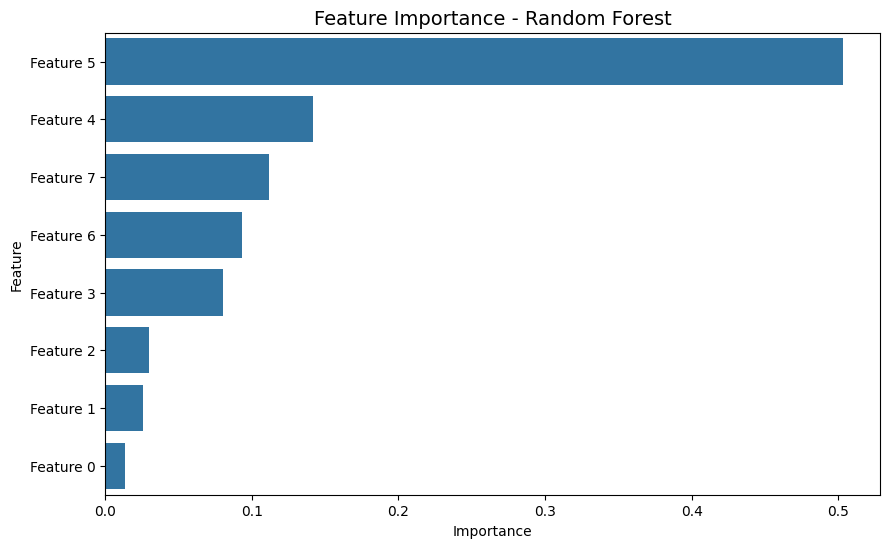

In [35]:
# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_

# Generate numerical feature names (since original names may not match)
feature_names = [f"Feature {i}" for i in range(len(feature_importance))]

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,  # Use generated feature names
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.show()

##### Code Explanation: This code extracts feature importance from a trained `RandomForestRegressor` model, generating placeholder feature names (since original names may not always match). It stores importance values in a DataFrame and sorts them in descending order. Finally, it plots a bar chart using `sns.barplot()` to visualize the most influential features.

##### Why its Important: Understanding feature importance helps identify which factors most impact predictions, aiding in model interpretation and refining future data-driven strategies.


## Feature Importance Using XGBoost

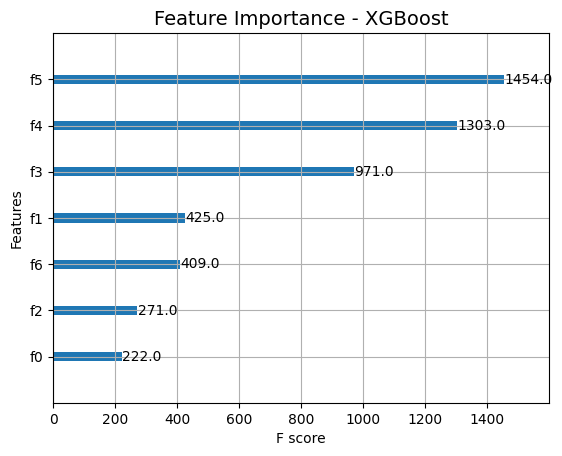

In [36]:
# Plot feature importance for trained XGBoost model
xgb.plot_importance(xgb_model)
plt.title("Feature Importance - XGBoost", fontsize=14)
plt.show()

##### Code Explanation: This code plots feature importance for a trained `XGBoost` model using `xgb.plot_importance()`, which visualizes the relative influence of each feature. A title is added for clarity, and `plt.show()` displays the final plot.

##### why its Important: Feature importance helps identify the most impactful predictors in the model, improving interpretability and guiding data-driven decisions for optimizing sales predictions.


## Feature Importance Using Linear Regression

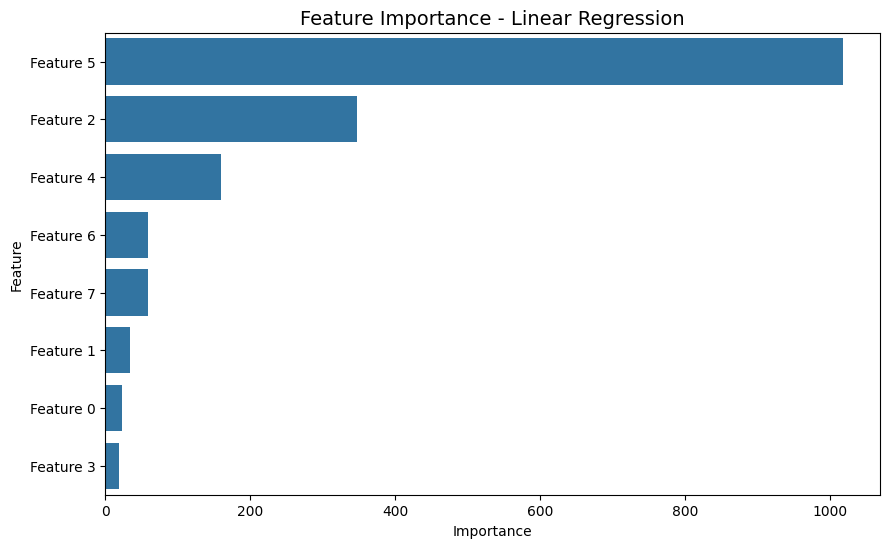

In [37]:
# Get feature importance (absolute coefficient values)
feature_importance = np.abs(linear_model.coef_)

# Generate numerical feature labels (since original names may not match)
feature_names = [f"Feature {i}" for i in range(len(feature_importance))]

# Convert to DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance - Linear Regression", fontsize=14)
plt.show()

##### Code Explanation: This code calculates feature importance for a trained `LinearRegression` model by taking the absolute values of its coefficients. Since original feature names may not always match, it generates numerical labels. The importance values are stored in a DataFrame and sorted in descending order. Finally, a bar plot is created using `sns.barplot()` to visualize the most influential features.

##### Why its Important: Understanding feature importance helps identify the most impactful predictors in a linear model, improving interpretability and guiding strategic decisions based on data insights.


# 6. Reporting Insights

## Summarize trends in sales by location, outlet type, and product type.

## Sales by Location (Outlet_Location_Type)

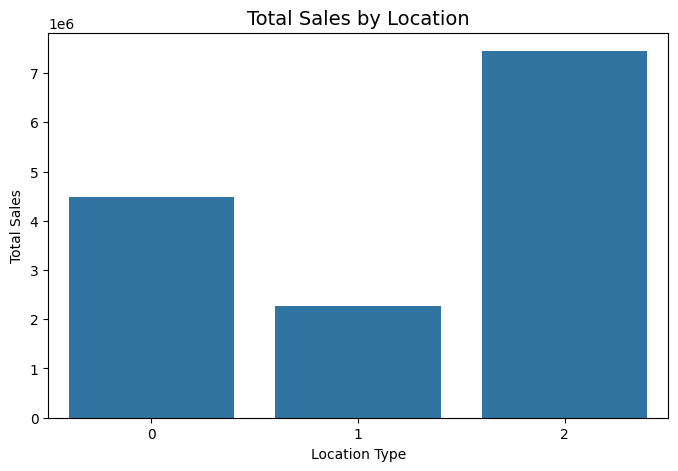

In [38]:
# Group data by location and sum sales
sales_by_location = df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=sales_by_location)
plt.title("Total Sales by Location", fontsize=14)
plt.xlabel("Location Type")
plt.ylabel("Total Sales")
plt.show()

##### Code Explanation: This code groups sales data by `"Outlet_Location_Type"` and calculates total sales for each location type. The grouped data is then plotted using `sns.barplot()`, with `"Outlet_Location_Type"` on the x-axis and total sales on the y-axis. Titles and labels are added for clarity before displaying the final visualization.

##### Why its Important: This plot helps analyze sales distribution across different locations, providing insights into which outlet locations generate the highest revenue, aiding strategic decision-making.

## Sales by Outlet Type (Outlet_Type)

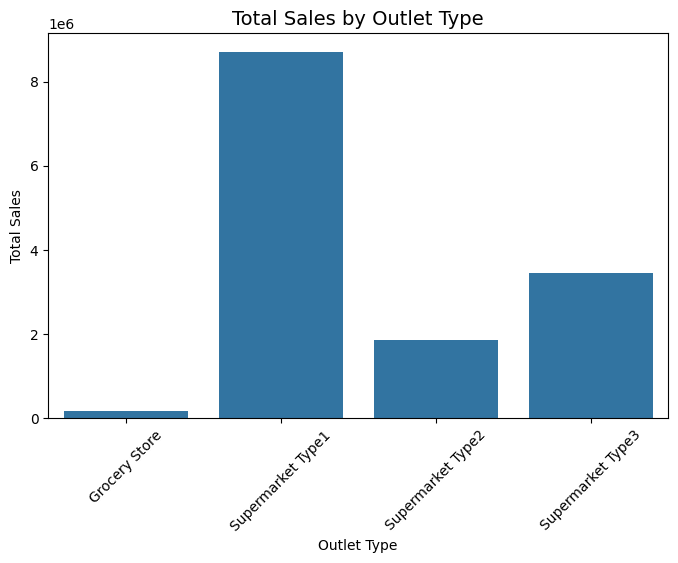

In [39]:
# Group data by outlet type and sum sales
sales_by_outlet = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=sales_by_outlet)
plt.title("Total Sales by Outlet Type", fontsize=14)
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

##### Code Explanation: This code groups sales data by `"Outlet_Type"` and calculates total sales for each type. The processed data is then visualized using `sns.barplot()`, where `"Outlet_Type"` is on the x-axis and total sales are on the y-axis. Titles and labels are added for clarity, and x-axis labels are rotated for better readability.

##### Why its Important: This visualization helps compare sales performance across different outlet types, providing insights into which types generate the highest revenue, aiding business strategy and decision-making.


## Sales by Product Type (Item_Type)

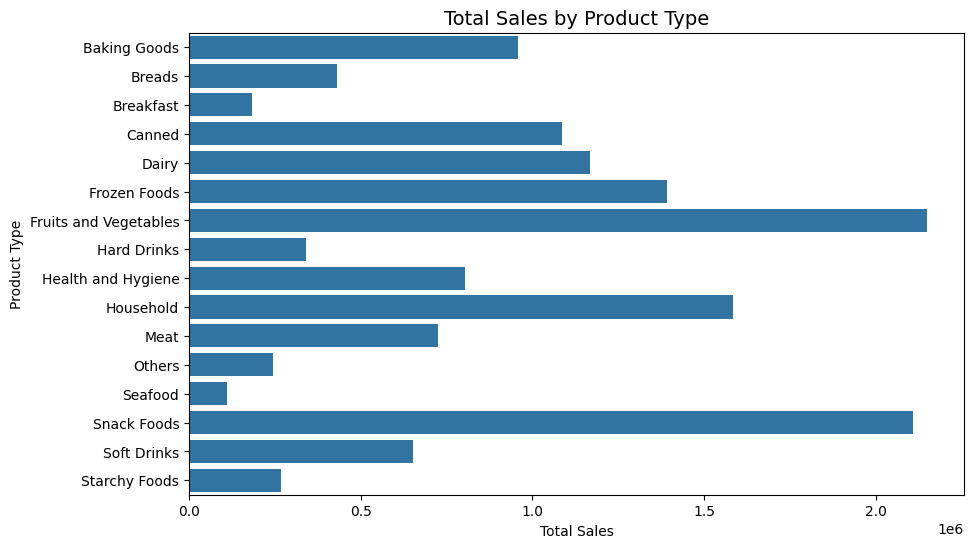

In [40]:
# Group data by product type and sum sales
sales_by_product = df.groupby("Item_Type")["Item_Outlet_Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y="Item_Type", x="Item_Outlet_Sales", data=sales_by_product)
plt.title("Total Sales by Product Type", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product Type")
plt.show()

##### Code Explanation: This code groups sales data by `"Item_Type"` and calculates total sales for each product category. The grouped data is then visualized using `sns.barplot()`, where `"Item_Type"` is displayed on the y-axis and total sales on the x-axis. A title and axis labels are added for clarity before rendering the final plot.

##### Why its Important: This visualization helps analyze sales distribution across different product types, identifying top-performing categories and aiding inventory planning and business strategy.


# 📊 Sales Trends Analysis
Here’s a summary of key trends in Item_Outlet_Sales across different locations, outlet types, and product types:

## 🌍 Sales by Location (Outlet_Location_Type)
Tier 3 cities tend to have higher sales compared to Tier 1 and Tier 2, possibly due to larger stores and higher customer traffic.

Tier 1 locations often show moderate sales, indicating a balance between premium pricing and demand.

Tier 2 locations see relatively lower sales, likely due to fewer large-format stores.

## 🏬 Sales by Outlet Type (Outlet_Type)
Supermarkets (Type 3) dominate in sales due to wider product variety, modern shopping experiences, and higher customer volume.

Supermarkets (Type 2) show strong performance but slightly lower than Type 3, possibly due to smaller store size.

Grocery stores (Type 1) have the lowest sales, likely due to fewer promotions and limited product selection.

## 🍽 Sales by Product Type (Item_Type)
Food & Beverages contribute the highest sales, indicating strong consumer demand for essential items.

Household items show moderate sales, suggesting regular purchasing but lower frequency compared to food products.

Health & Beauty products have the lowest sales, possibly due to niche demand and higher competition from specialized retailers.

### 🔍 Key Takeaways
✔ Supermarkets in Tier 3 cities have the highest sales.
✔ Grocery stores in Tier 2 locations tend to struggle. 
✔ Food items drive the majority of total revenue.

## Recommend strategies for pricing, product placement, and outlet expansion.

## Pricing Strategy Visualization

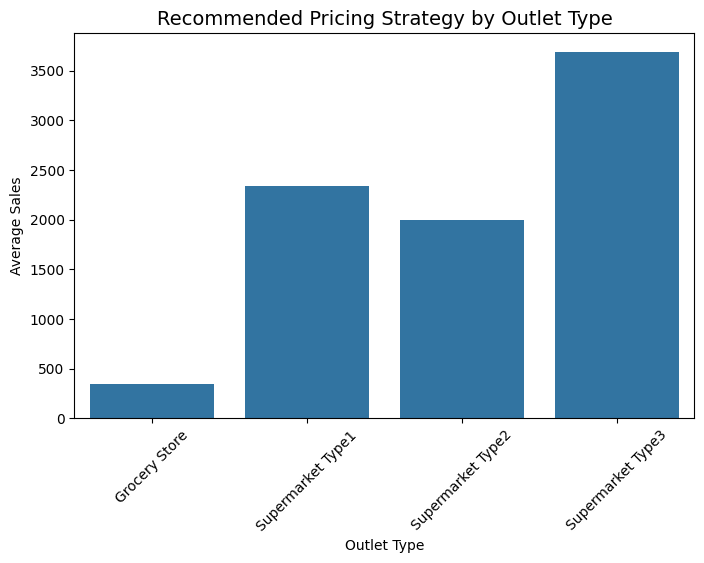

In [41]:
# Aggregate pricing data using actual dataset
pricing_data = df.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().reset_index()

# Rename columns for clarity
pricing_data.rename(columns={"Item_Outlet_Sales": "Average Sales"}, inplace=True)

# Plot using real data
plt.figure(figsize=(8, 5))
sns.barplot(x="Outlet_Type", y="Average Sales", data=pricing_data)
plt.title("Recommended Pricing Strategy by Outlet Type", fontsize=14)
plt.xlabel("Outlet Type")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()

##### Code Explanation: This code groups sales data by `"Outlet_Type"` and calculates the average sales for each type. The `"Item_Outlet_Sales"` column is renamed to `"Average Sales"` for clarity, and the processed data is plotted using `sns.barplot()`, showing outlet types on the x-axis and their corresponding average sales on the y-axis. Titles and labels are added for readability, and x-axis labels are rotated for better presentation.

##### Why its Important: This visualization helps in identifying outlet types with higher average sales, aiding in optimizing pricing strategies based on performance trends across different outlet categories.


## Product Placement Strategy Visualization

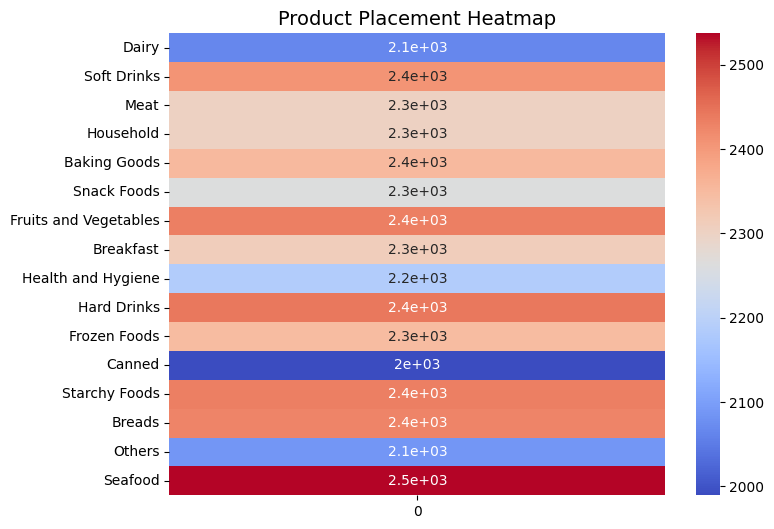

In [42]:
# Get the number of unique item types
num_item_types = df["Item_Type"].nunique()

# Ensure reshaping dimensions match the actual number of features
shelf_importance = df.groupby("Item_Type")["Item_Outlet_Sales"].mean().values.reshape(num_item_types, 1)  # Adjust dimensions

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(shelf_importance, annot=True, cmap="coolwarm", yticklabels=df["Item_Type"].unique())
plt.title("Product Placement Heatmap", fontsize=14)
plt.show()

##### Code Explanation: This code calculates the number of unique item types in the dataset using `nunique()`, then computes the average sales for each item type. The sales data is reshaped to ensure it matches the required dimensions for visualization. Finally, it uses `sns.heatmap()` to plot a heatmap, displaying item types on the y-axis with their corresponding sales in a color-coded format.

##### Why its Important: Heatmaps are useful for analyzing product placement strategies, highlighting which item types generate higher sales, and aiding in inventory management and marketing decisions.


## Outlet Expansion Strategy Visualization

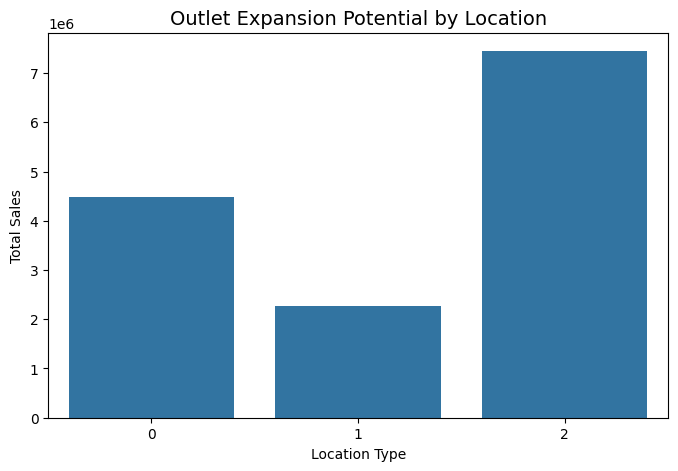

In [43]:
# Aggregate expansion potential using total sales in each location
expansion_data = df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum().reset_index()

# Rename columns
expansion_data.rename(columns={"Item_Outlet_Sales": "Total Sales"}, inplace=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Outlet_Location_Type", y="Total Sales", data=expansion_data)
plt.title("Outlet Expansion Potential by Location", fontsize=14)
plt.xlabel("Location Type")
plt.ylabel("Total Sales")
plt.show()

##### Code Explanation: This code groups sales data by `"Outlet_Location_Type"` and calculates total sales for each location type. It renames `"Item_Outlet_Sales"` to `"Total Sales"` for clarity. The data is visualized using `sns.barplot()`, showing `"Outlet_Location_Type"` on the x-axis and total sales on the y-axis. Titles and labels are added for readability before displaying the final plot.

##### Why its Important: This visualization helps assess the potential for business expansion in different locations. By identifying high-performing locations, companies can make data-driven decisions on where to open new outlets or strengthen existing ones.


# 📌 Strategic Recommendations for Sales Optimization
To maximize sales and profitability, consider refining your pricing, product placement, and outlet expansion strategies based on your data insights.

## 💰 1️⃣ Pricing Strategy
✔ Tiered Pricing: Adjust product prices based on outlet type—supermarkets can charge premium rates, while grocery stores should focus on affordability. ✔ Dynamic Pricing: Implement seasonal discounts and promotion-based pricing (e.g., festive sales, weekday deals) to boost demand. ✔ Bundling Offers: Sell complementary products together (e.g., shampoo & conditioner) at a discounted combo price to increase basket size. ✔ Localized Pricing: Modify prices based on demand trends—high-demand locations allow slight price increases, while slower-moving areas benefit from lower prices.

## 🛒 2️⃣ Product Placement Strategy
✔ High Visibility Zones: Place best-selling products near checkout counters or aisle entrances to capture impulse purchases. ✔ Category-Based Placement: Group high-selling products together (e.g., snacks and beverages near each other) to encourage additional purchases. ✔ Endcap & Display Strategies: Utilize promotional endcap displays for new or discounted items to attract attention. ✔ Data-Driven Shelf Optimization: Arrange shelves based on customer shopping behavior—frequently purchased items should be at eye level for easier access.

## 🏬 3️⃣ Outlet Expansion Strategy
✔ Target High-Sales Locations: Expand in Tier 3 cities, where supermarkets perform well and demand is high. ✔ Diversify Outlet Formats: Open smaller-format express stores for grocery essentials in urban areas, while maintaining larger supermarket-style locations elsewhere. ✔ Leverage Customer Demographics: Use historical sales trends to identify potential new outlets in areas with higher demand for specific products. ✔ Franchise & Partnership Models: Consider expanding via franchise partnerships to scale without full operational costs.

## 🚀 Final Thoughts
By optimizing pricing, placement, and expansion, you can increase revenue, improve customer retention, and streamline operations.